<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# New ones!
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [2]:
# Import the data
df = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

In [3]:
# Checking the number of columns and rows
df.shape

(985, 12)

In [4]:
# Checking columns 
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
#Check type of each column
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
# Check null variables
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
#Checking duplicate rows
df.duplicated().value_counts()

False    982
True       3
dtype: int64

In [8]:
#Check outlier and abnormal data
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [9]:
df[df.sq__ft<=0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [10]:
df[df.price<=0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
# check for value in unsuitable value in each columns
print ('state column')
print (df['state'].value_counts())
print ('\n')
print ('bed column')
print (df['beds'].value_counts())
print ('\n')
print ('bath column')
print (df['baths'].value_counts())
print ('\n')
print ('type column')
print (df['type'].value_counts())
print ('\n')
print ('sale_date column')
print (df['sale_date'].value_counts())

state column
CA    984
AC      1
Name: state, dtype: int64


bed column
3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64


bath column
2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64


type column
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64


sale_date column
Mon May 19 00:00:00 EDT 2008    268
Fri May 16 00:00:00 EDT 2008    264
Tue May 20 00:00:00 EDT 2008    177
Wed May 21 00:00:00 EDT 2008    158
Thu May 15 00:00:00 EDT 2008    118
Name: sale_date, dtype: int64


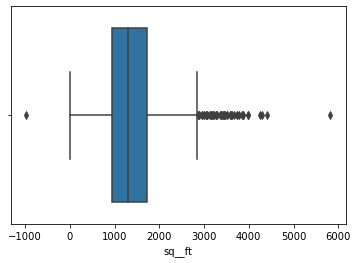

In [12]:
sns.boxplot(x = df['sq__ft']);

#### From discovering

The result shows the issues following this:
1. Duplicate is found.
2. State column has AC only one value.
3. Square feet and Price value has a minus sign which isn't matched with data information.
4. 0 amount of bed and bathroom.
5. 0 in square feet
6. Unkomn in type column.
7. One row which has minus sign in square feet and price which is not suitable.
8. Outlier of square feet.

### 2. Conduct exploratory data analysis on this data set. 

In [13]:
df[df.state == 'AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [14]:
#From checking the issue AC value and minus sign is in the same row. Thus, it will be dropped.

df = df.drop(df.index[703])

In [15]:
#For the beds bath and sq__ft columns which rows has 0 will be dropped too. 
# Drop unkown value in 'state'
#If we replace it by mean or median, it may affect to correlation of these variable with price.

df = df[df['beds'] != 0]
df = df[df['baths'] != 0]
df = df[df['sq__ft'] != 0]
df = df[df['state'] != 'Unkown']

In [16]:
#Drop duplicate
df.drop_duplicates(inplace = True)

In [17]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,95761.501850,3.247842,1.963009,1593.212084,229746.900123,38.576806,-121.378543
std,85.295425,0.848516,0.669337,664.102137,119891.141884,0.126406,0.119818
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1145.000000,148750.000000,38.473794,-121.451482
50%,95820.000000,3.000000,2.000000,1420.000000,208000.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.000000,1853.500000,285000.000000,38.674545,-121.325958
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [18]:
df.sort_values(by = 'sq__ft')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,Mon May 19 00:00:00 EDT 2008,48000,38.582279,-121.401482
292,5411 10TH AVE,SACRAMENTO,95820,CA,2,1,539,Residential,Tue May 20 00:00:00 EDT 2008,334000,38.542727,-121.442449
18,250 PERALTA AVE,SACRAMENTO,95833,CA,2,1,588,Residential,Wed May 21 00:00:00 EDT 2008,120000,38.612099,-121.469095
168,5028 14TH AVE,SACRAMENTO,95820,CA,2,1,610,Residential,Tue May 20 00:00:00 EDT 2008,93675,38.539420,-121.446894
868,9127 NEWHALL DR Unit 34,SACRAMENTO,95826,CA,1,1,611,Condo,Thu May 15 00:00:00 EDT 2008,60000,38.542419,-121.359904
...,...,...,...,...,...,...,...,...,...,...,...,...
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,Mon May 19 00:00:00 EDT 2008,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,Mon May 19 00:00:00 EDT 2008,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858


In [19]:
#Drop outlier
df = df[df['sq__ft'] != 5822]

In [20]:
df.sort_values(by = 'price')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,Fri May 16 00:00:00 EDT 2008,30000,38.715322,-121.314787
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,Mon May 19 00:00:00 EDT 2008,40000,38.673678,-121.357471
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,Mon May 19 00:00:00 EDT 2008,48000,38.582279,-121.401482
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,Fri May 16 00:00:00 EDT 2008,55422,38.471646,-121.435158
867,7401 TOULON LN,SACRAMENTO,95828,CA,4,2,1512,Residential,Thu May 15 00:00:00 EDT 2008,56950,38.488628,-121.387759
...,...,...,...,...,...,...,...,...,...,...,...,...
552,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
333,1409 47TH ST,SACRAMENTO,95819,CA,5,2,2484,Residential,Tue May 20 00:00:00 EDT 2008,699000,38.563244,-121.446876
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5,3,3670,Residential,Mon May 19 00:00:00 EDT 2008,760000,38.779435,-121.146676
334,3935 EL MONTE DR,LOOMIS,95650,CA,4,4,1624,Residential,Tue May 20 00:00:00 EDT 2008,839000,38.813337,-121.133348


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

In [21]:
df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

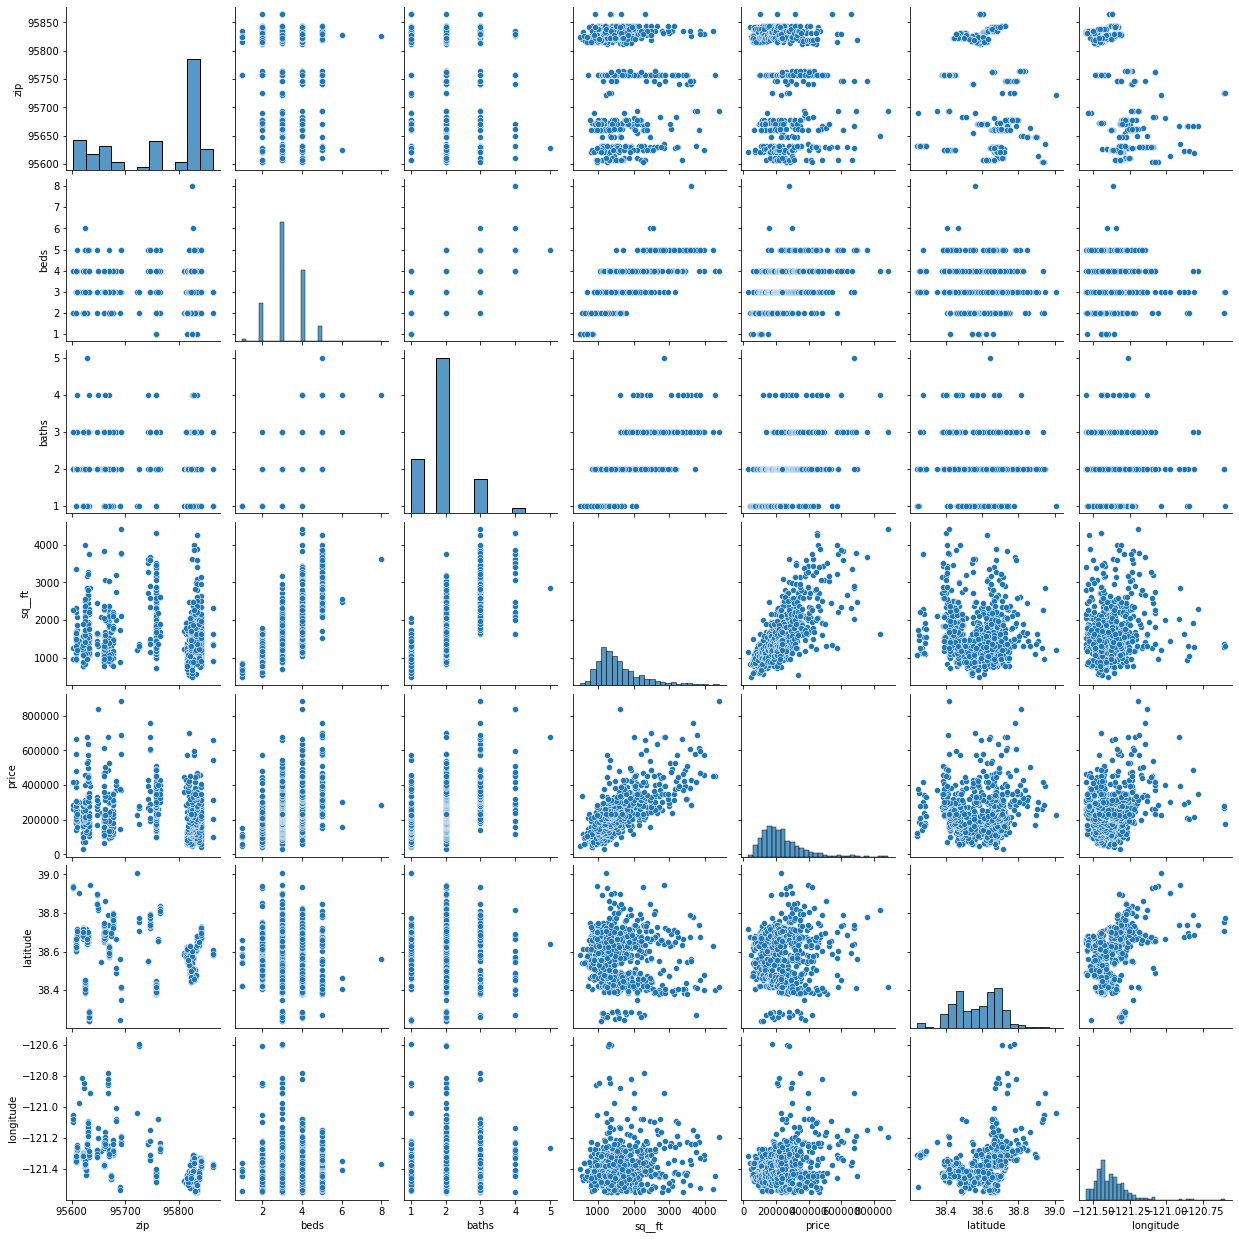

In [22]:
#Overview
sns.pairplot(df);

In [23]:
#Checking correlation to be an additional information for chosing
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.067800,-0.098137,-0.096216,-0.222935,-0.133781,-0.561458
beds,-0.067800,1.000000,0.657982,0.716979,0.443219,-0.107879,0.052791
baths,-0.098137,0.657982,1.000000,0.722341,0.512347,-0.078771,0.098522
sq__ft,-0.096216,0.716979,0.722341,1.000000,0.728268,-0.099697,0.121558
price,-0.222935,0.443219,0.512347,0.728268,1.000000,0.057508,0.284505
latitude,-0.133781,-0.107879,-0.078771,-0.099697,0.057508,1.000000,0.347813
longitude,-0.561458,0.052791,0.098522,0.121558,0.284505,0.347813,1.000000


**Ans:**

From the plot and table in `price` correlation, it suggests to choose `beds` , `baths`, and, `sq__ft` as predictors.

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [24]:
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.067800,-0.098137,-0.096216,-0.222935,-0.133781,-0.561458
beds,-0.067800,1.000000,0.657982,0.716979,0.443219,-0.107879,0.052791
baths,-0.098137,0.657982,1.000000,0.722341,0.512347,-0.078771,0.098522
sq__ft,-0.096216,0.716979,0.722341,1.000000,0.728268,-0.099697,0.121558
price,-0.222935,0.443219,0.512347,0.728268,1.000000,0.057508,0.284505
latitude,-0.133781,-0.107879,-0.078771,-0.099697,0.057508,1.000000,0.347813
longitude,-0.561458,0.052791,0.098522,0.121558,0.284505,0.347813,1.000000


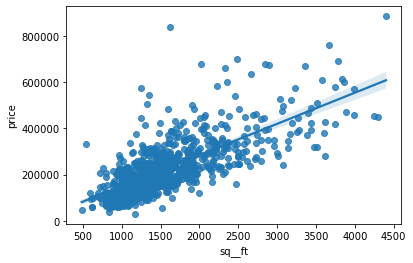

In [25]:
sns.regplot(x=df['sq__ft'], y=df['price']);

**Ans:** 

The square feet value is the best predictor because it has the highest correlation from other valuables.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [26]:
#Appoint valuable in dataframe
X = df['sq__ft']
y = df['price']

In [27]:
#Define function
def interslope(X,y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    std_X = np.std(X)
    std_y = np.std(y)
    cor_X_y = np.corrcoef(X, y)[0][1]
    cof = cor_X_y * (std_y / std_X)
    intc = mean_y - (cof * mean_X)
    
    return(cof,intc)

### 6. Interpret the intercept and the slope.

In [28]:
#Value the valuable 

cof,intc = interslope(X,y)
print(cof)
print(intc)

134.5979823589555
16287.63634222126


**Slope interpreting:** 

For every 1 degree increase in square feet, we would expect price will increase 134.6 dollar USD.

**Intercept interpreting:**

When we need to compare area to price, we expect the start price will be 16,287.64 dollar USD. 

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

When the square feet of area is increased by one, the price of land will increase by 53.76 dollar

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [29]:
#Calculate residuals which need to predict y first
y_preds = intc + (cof * X)

resids = y - y_preds

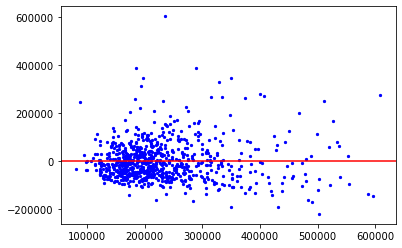

In [30]:
#Plot scatter to show the residual which around Zero value.
plt.scatter(y_preds, resids, s=5,color = 'b')
plt.axhline(0, color="r");

From the residual, the plotting shows that most of residual plot is ploted between 0 line which is suitable. But it still have some plot which show outlier. It should be cleared in some ways.

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [31]:
#Create dummy variables from type column which drop the first rows  
pd.get_dummies(columns = ['type'], data = df,drop_first = True)

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,0,1
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,0,1
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,0,1
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,0,1


In [32]:
#Define new Dataframe
df_new = pd.get_dummies(columns = ['type'], data = df,drop_first = True)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [33]:
#Check Dataframe
df_new.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [34]:
#Check Correlation for picking the suitable columns which has the high correlation while comparing other variables
df_new.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude,type_Multi-Family,type_Residential
zip,1.000000,-0.067800,-0.098137,-0.096216,-0.222935,-0.133781,-0.561458,0.028143,-0.029937
beds,-0.067800,1.000000,0.657982,0.716979,0.443219,-0.107879,0.052791,0.182644,0.223994
baths,-0.098137,0.657982,1.000000,0.722341,0.512347,-0.078771,0.098522,0.214254,0.058504
sq__ft,-0.096216,0.716979,0.722341,1.000000,0.728268,-0.099697,0.121558,0.090557,0.145765
price,-0.222935,0.443219,0.512347,0.728268,1.000000,0.057508,0.284505,-0.005865,0.168663
latitude,-0.133781,-0.107879,-0.078771,-0.099697,0.057508,1.000000,0.347813,0.021266,-0.078321
longitude,-0.561458,0.052791,0.098522,0.121558,0.284505,0.347813,1.000000,0.027657,-0.006264
type_Multi-Family,0.028143,0.182644,0.214254,0.090557,-0.005865,0.021266,0.027657,1.000000,-0.477866
type_Residential,-0.029937,0.223994,0.058504,0.145765,0.168663,-0.078321,-0.006264,-0.477866,1.000000


In [35]:
# Four variable which i choose are `beds`,`baths`, and `sq__ft`,and 'type' columns
# Choose follow the highest correlation with price

df_choose = df_new[['beds','baths','sq__ft','price','type_Multi-Family','type_Residential']]

In [36]:
df_choose

,beds,baths,sq__ft,price,type_Multi-Family,type_Residential
0,2,1,836,59222,0,1
1,3,1,1167,68212,0,1
2,2,1,796,68880,0,1
3,2,1,852,69307,0,1
4,2,1,797,81900,0,1
...,...,...,...,...,...,...
980,4,3,2280,232425,0,1
981,3,2,1477,234000,0,1
982,3,2,1216,235000,0,1
983,4,2,1685,235301,0,1


In [37]:
#Dummify
X = df_choose.drop(columns=['price'])
y = df_choose['price']

In [38]:
#Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
#Instantiate the model
lr = LinearRegression()

In [40]:
#Fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
#Check R-square
lr.score(X_train,y_train)

0.5711774744569733

In [42]:
#Check R-square
lr.score(X_test,y_test)

0.48170676207919083

In [43]:
#Check coefficient for each X variable
lr.coef_

array([-30098.74447299,   6143.65654655,    158.7225387 , -47717.54663328,
        33233.71901265])

In [44]:
#Predict y
y_preds = lr.predict(X_test)

In [45]:
#Check mean of predict values
y_preds.mean()

226997.41852550942

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

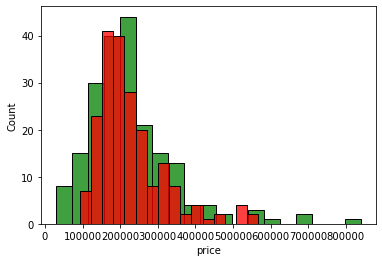

In [46]:
#Plot histrogram plot for checking the differnce between y and y predict 
sns.histplot(y_test,color ='g');
sns.histplot(y_preds,color ='r');

Due to the graph, it shows that the predict value with red color has is in the suitable way while compare with testing data but the graph still have outlier. If i didn't drop it, my model can be breaked.

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

#### ANS
- L - Linear relationship
- I - Independent errors
- N - Normally distributed errors
- E - Equal variance of errors (homoscedasticity)
- M - No Multicollinearity/Independence of Predictors

The same assumptions are LINE

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

N - Normally distributed errors may be found if i can't clear all outlier. 

M - Multicolinearity may not be found because each variable has not abnormal high correlation.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [47]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          3.90e-137
Time:                        16:11:33   Log-Likelihood:                -10296.
No. Observations:                 810   AIC:                         2.060e+04
Df Residuals:                     804   BIC:                         2.063e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.473e+04   1.47e+04      1.678      0.094   -4198.242    5.37e+04
beds               -2.68e+04   5271.282     -5.083      0.000   -3.71e+04   -1.64e+04
baths              7156.2916   6526.548      1.096      0.273   -5654.792       2e+04
sq__ft              152.5451      7.203     21.177      0.000     138.405     166.685
type_Multi-Family -1.491e+04   2.75e+04     -0.541      0.588    -6.9e+04    3.92e+04
type_Residential    3.89e+04   1.39e+04      2.805      0.005    1.17e+04    6.61e+04
==============================================================================
Omnibus:                      314.490   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1787.809
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                       9.471   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [49]:
feature = df_choose

In [50]:
# Create function to calculate adjust r square
def r2_adj(y_test,y_preds):
    ''' Adjusted R^2 = 1 - [(1-R2)*(n-1)/ (n-k-1)]
        R2: The R2 of the model
        n: the number of observations
        k: the number of features or predictors variables or values in X'''
    
    adj_r = 1 - (1-metrics.r2_score(y_test, y_preds))*(len(y_test)-1)/ \
                                            (len(y_test)-len(feature)-1)
    return adj_r

In [51]:
r2_adj(y_test,y_preds)

1.1721961086513215

** Still can't do this one

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [52]:
# Calculate r-square, mean absolute error, mean squared error, and root mean squared error.
r2 = metrics.r2_score(y_test,y_preds)
mae = metrics.mean_absolute_error(y_test,y_preds)
mse = metrics.mean_squared_error(y_test,y_preds)
rmse = metrics.mean_squared_error(y_test,y_preds,squared=False)

In [53]:
print(r2)
print(mae)
print(mse)
print(rmse)

0.48170676207919083
56206.46441400351
7234672977.421339
85056.88083524659


My model is very bad due to the low variance and high error. It may affected by the outlier. It should be dropped in next step. 

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [54]:
df_choose.head(1)

,beds,baths,sq__ft,price,type_Multi-Family,type_Residential
0,2,1,836,59222,0,1


In [55]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

#Try to get dummies in other suitable varable

In [56]:
# Get dummy for every valiable which can.
df_choose1 = pd.get_dummies(columns = ['city','state','beds','baths','type','sale_date'],data = df, drop_first= True)

In [57]:
#Drop un-unused variables
df_choose1 = df_choose1.drop(columns = ['street','zip'],axis =1)

In [58]:
df_choose1

,sq__ft,price,latitude,longitude,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,...,baths_2,baths_3,baths_4,baths_5,type_Multi-Family,type_Residential,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,836,59222,38.631913,-121.434879,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1167,68212,38.478902,-121.431028,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,796,68880,38.618305,-121.443839,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,852,69307,38.616835,-121.439146,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,797,81900,38.519470,-121.435768,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2280,232425,38.457679,-121.359620,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
981,1477,234000,38.499893,-121.458890,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
982,1216,235000,38.708824,-121.256803,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
983,1685,235301,38.417000,-121.397424,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [59]:
#Appoint X and y
X = df_choose1.drop(columns = ['price'])
y = df_choose1['price']

In [60]:
# Split train and test dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# fit the valuables in linear regression model
lr.fit(X,y)

LinearRegression()

In [62]:
#Check r-square score of training model
lr.score(X_train,y_train)

0.7020504478057685

In [63]:
#Check r-square score of testing model
lr.score(X_test,y_test)

0.6537986184544993

In [64]:
#Predict y
y_preds = lr.predict(X_test)

In [65]:
#Checking the differnce betweeb new and old model
r2 = metrics.r2_score(y_test,y_preds)
mae = metrics.mean_absolute_error(y_test,y_preds)
mse = metrics.mean_squared_error(y_test,y_preds)
rmse = metrics.mean_squared_error(y_test,y_preds,squared=False)

print(r2)
print(mae)
print(mse)
print(rmse)

0.6537986184544993
46335.645145596616
4832503294.584482
69516.20886228248


In [66]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     31.80
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          4.73e-157
Time:                        16:11:34   Log-Likelihood:                -10145.
No. Observations:                 810   AIC:                         2.040e+04
Df Residuals:                     756   BIC:                         2.065e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -7.375e+06   6.79e+06     -1.086      0.278   -2.07e+07    5.95e+06
sq__ft                                   134.6126      7.438     18.098      0.000     120.011     149.214
latitude                                5.143e+04   4.33e+04      1.188      0.235   -3.35e+04    1.36e+05
longitude                              -4.436e+04   5.58e+04     -0.795      0.427   -1.54e+05    6.51e+04
city_AUBURN                             1.295e+05   4.65e+04      2.782      0.006    3.81e+04    2.21e+05
city_CAMERON PARK                       1.261e+05   7.31e+04      1.724      0.085   -1.75e+04     2.7e+05
city_CARMICHAEL                          8.95e+04      2e+04      4.470      0.000    5.02e+04    1.29e+05
city_CITRUS HEIGHTS                     1.328e+04   1.73e+04      0.767      0.443   -2.07e+04    4.73e+04
city_COOL                               9.955e+04   7.41e+04      1.344      0.179   -4.59e+04    2.45e+05
city_DIAMOND SPRINGS                    5.523e+04   7.65e+04      0.722      0.470   -9.49e+04    2.05e+05
city_EL DORADO                          7.322e+04   5.76e+04      1.272      0.204   -3.98e+04    1.86e+05
city_EL DORADO HILLS                    8.293e+04   4.46e+04      1.860      0.063   -4574.607     1.7e+05
city_ELK GROVE                          2.478e+04   1.94e+04      1.276      0.202   -1.33e+04    6.29e+04
city_ELVERTA                           -4.657e+04   3.68e+04     -1.265      0.206   -1.19e+05    2.57e+04
city_FAIR OAKS                          5.144e+04   2.81e+04      1.829      0.068   -3773.987    1.07e+05
city_FOLSOM                             1.323e+05   2.48e+04      5.327      0.000    8.35e+04    1.81e+05
city_GALT                               3.393e+04   2.73e+04      1.242      0.215   -1.97e+04    8.76e+04
city_GOLD RIVER                         8.402e+04   4.26e+04      1.971      0.049     344.815    1.68e+05
city_GRANITE BAY                        3.124e+05   4.35e+04      7.186      0.000    2.27e+05    3.98e+05
city_GREENWOOD                           1.09e+04   7.67e+04      0.142      0.887    -1.4e+05    1.61e+05
city_LINCOLN                            4.401e+04   3.18e+04      1.383      0.167   -1.84e+04    1.06e+05
city_LOOMIS                             3.764e+05   5.32e+04      7.069      0.000    2.72e+05    4.81e+05
city_MATHER                            -4.099e+04   7.08e+04     -0.579      0.563    -1.8e+05    9.81e+04
city_MEADOW VISTA                       4.153e+04   7.41e+04      0.560      0.575   -1.04e+05    1.87e+05
city_NORTH HIGHLANDS                   -2.593e+04   1.97e+04     -1.318      0.188   -6.45e+04    1.27e+04
city_ORANGEVALE                         6.391e+04   2.53e+04      2.529      0.012    1

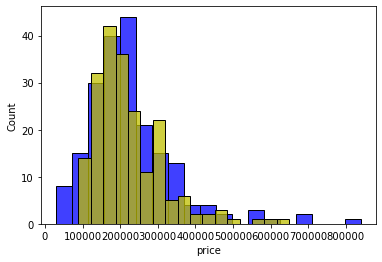

In [68]:
#Checking by plot histrograpm
sns.histplot(y_test,color ='b');
sns.histplot(y_preds,color ='y');

From the calculation, the model performing is increased due to the decreased of train and test model and decreasing of root mean squared error which shows the real average of residual or error.

### 19. Bias vs. Variance

(To be completed after the bias-variance tradeoff lecture.) At this point, do you think your model is high bias, high variance or in the sweet spot?

From the model' score, it isn't high variance due to the variance is not high 0.6537986184544993 and not high bias too. Due to the score of train model which is 0.7020504478057685, they aren't different than 0.5 which are accepted.